In [1]:
# data manipulation imports
import numpy as np
import pandas as pd

# data saving imports
import pickle
import os

# custom imports
from regression_class import LogisticRegression as logreg
from regression_class import TimestampClass


In [8]:
# infiles
regression_infile = "regression_thread_data.p"
thread_infile = 'clean_5_thread_data.p'

# outfiles
outdir = 'feature_selection_max_days_v2'
metrics_outfile = "regression_metrics"

# params
X_COLS = [
    'sentiment_sign', 'sentiment_magnitude', 'hour', 'num_dayofweek','activity_ratio',
    'mean_author_sentiment_sign', 'mean_author_sentiment_magnitude', 'author_all_activity_count',
    ]

# regression params dict
regression_params = {
    'collection_window': 7,
    'validation_window': 7,
    'FSS': True,
    'performance_scoring_method': 'roc_auc',
    'x_cols': X_COLS,
    'y_col': 'success',
    'metrics': ['roc_auc', 'aic']
}

In [9]:
# make out params df to save to spreadsheet
out_params = {}
out_params['regression_infile'] = regression_infile
out_params['thread_infile'] = thread_infile

# make out directory
if not os.path.isdir(outdir):
    os.mkdir(outdir)


In [10]:
# read in files
regression_df = pickle.load(open(regression_infile, 'rb'))
thread_df = pickle.load(open(thread_infile, 'rb'))

In [11]:
thread_df['politics'][['id', 'author']].groupby('author').count()

,id
author,
000004b089d14532233ebd7d7252e77499bba8ec30eabbd0,2
00001c7e66a3ac1caad3070bfa54e3c0cc4bc3f07f975062,8
00002c0ed0f84810514c0ccc8b577bbe5f1bf00540471356,1
00004061d270e983965c89f6660387b4a5078df1c6f4cc8f,4
000042f8ad92d304e42dc275933a271c4c6f2f2f20750175,1
...,...
ffff6740f962ba671fa36c729ea79b6d5cc45af65a3bf9f7,2
ffffb73a107fd67db48328b2f17e2368125fb22dd2706b8d,3
ffffb9fb31f780bd61419e2ed16b21a44f121ac8bcddf95f,62


In [12]:
# place to store logregs
subreddit_logregs = {}

In [13]:
# go through subreddits and run regressions
for subreddit in regression_df:
    print(f'###{subreddit}###')
    regression_params['name'] = subreddit
    regression_params['regression_data'] = regression_df[subreddit]
    regression_params['thread_data'] = thread_df[subreddit]

    subreddit_logregs[subreddit] = logreg(regression_params)
    subreddit_logregs[subreddit].main()

###books###
# Period 1 #
Running FSS


/home/cara/anaconda3/envs/redditenv/lib/python3.10/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/cara/anaconda3/envs/redditenv/lib/python3.10/site-packages/numpy/core/_methods.py:261: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/cara/anaconda3/envs/redditenv/lib/python3.10/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/cara/anaconda3/envs/redditenv/lib/python3.10/site-packages/numpy/core/_methods.py:261: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Model 1
Optimization terminated successfully.
         Current function value: 0.629590
         Iterations 5
Model 2
Optimization terminated successfully.
         Current function value: 0.628590
         Iterations 5
Model 3
Optimization terminated successfully.
         Current function value: 0.628421
         Iterations 5
Model 4
Optimization terminated successfully.
         Current function value: 0.627323
         Iterations 5
Model 5
Optimization terminated successfully.
         Current function value: 0.626778
         Iterations 5
Model 6
Optimization terminated successfully.
         Current function value: 0.625696
         Iterations 5
Model 7
Optimization terminated successfully.
         Current function value: 0.624853
         Iterations 5
Model 8
Optimization terminated successfully.
         Current function value: 0.624651
         Iterations 5
###conspiracy###
# Period 1 #
Running FSS


/home/cara/anaconda3/envs/redditenv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/cara/anaconda3/envs/redditenv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/lin

Model 1
Optimization terminated successfully.
         Current function value: 0.397481
         Iterations 6
Model 2
Optimization terminated successfully.
         Current function value: 0.395411
         Iterations 7
Model 3
Optimization terminated successfully.
         Current function value: 0.395276
         Iterations 7
Model 4
Optimization terminated successfully.
         Current function value: 0.394295
         Iterations 7
Model 5
Optimization terminated successfully.
         Current function value: 0.394214
         Iterations 7
Model 6
Optimization terminated successfully.
         Current function value: 0.394186
         Iterations 7
Model 7
Optimization terminated successfully.
         Current function value: 0.393812
         Iterations 7
Model 8
Optimization terminated successfully.
         Current function value: 0.392020
         Iterations 7
###crypto###
# Period 1 #
Running FSS


/home/cara/anaconda3/envs/redditenv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/cara/anaconda3/envs/redditenv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/lin

Model 1
Optimization terminated successfully.
         Current function value: 0.640276
         Iterations 6
Model 2
Optimization terminated successfully.
         Current function value: 0.640110
         Iterations 6
Model 3
Optimization terminated successfully.
         Current function value: 0.630969
         Iterations 6
Model 4
Optimization terminated successfully.
         Current function value: 0.630650
         Iterations 6
Model 5
Optimization terminated successfully.
         Current function value: 0.629677
         Iterations 6
Model 6
Optimization terminated successfully.
         Current function value: 0.583733
         Iterations 6
Model 7
Optimization terminated successfully.
         Current function value: 0.578838
         Iterations 6
Model 8
Optimization terminated successfully.
         Current function value: 0.577876
         Iterations 6
###thedonald###
# Period 1 #
Running FSS
Model 1
Optimization terminated successfully.
         Current function value: 

/home/cara/anaconda3/envs/redditenv/lib/python3.10/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/cara/anaconda3/envs/redditenv/lib/python3.10/site-packages/numpy/core/_methods.py:261: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/cara/anaconda3/envs/redditenv/lib/python3.10/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/cara/anaconda3/envs/redditenv/lib/python3.10/site-packages/numpy/core/_methods.py:261: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Model 5
Optimization terminated successfully.
         Current function value: 0.611197
         Iterations 5
Model 6
Optimization terminated successfully.
         Current function value: 0.611058
         Iterations 5
Model 7
Optimization terminated successfully.
         Current function value: 0.610975
         Iterations 5
Model 8
Optimization terminated successfully.
         Current function value: 0.610950
         Iterations 5
###politics###
# Period 1 #
Running FSS


/home/cara/anaconda3/envs/redditenv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/cara/anaconda3/envs/redditenv/lib/python3.10/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/cara/anaconda3/envs/redditenv/lib/python3.10/site-packages/numpy/core/_methods.py:261: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/cara/anaconda3/envs/redditenv/lib/python3.10/site-packages/numpy/c

Model 1
Optimization terminated successfully.
         Current function value: 0.642231
         Iterations 5
Model 2
Optimization terminated successfully.
         Current function value: 0.642223
         Iterations 5
Model 3
Optimization terminated successfully.
         Current function value: 0.634955
         Iterations 5
Model 4
Optimization terminated successfully.
         Current function value: 0.634117
         Iterations 5
Model 5
Optimization terminated successfully.
         Current function value: 0.633769
         Iterations 5
Model 6
Optimization terminated successfully.
         Current function value: 0.633427
         Iterations 5
Model 7
Optimization terminated successfully.
         Current function value: 0.632584
         Iterations 5
Model 8
Optimization terminated successfully.
         Current function value: 0.629389
         Iterations 5


In [14]:
pickle.dump(subreddit_logregs, open(f"{outdir}/all_logregs.p", 'wb'))

In [15]:
subreddit_logregs = pickle.load(open(f"{outdir}/all_logregs.p", 'rb'))

In [16]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

In [27]:
def plot_metrics_vs_features_one_period(
    regression_metrics,
    period,
    metrics_to_plot,
    name="",
    figsize=(10, 10),
    legend_loc=(1, 1),
    outfile="",
    fontsize=18
):
    """Plot given metrics (aic, auc, bic) on 1 plot for specified model period.

    Parameters
    ----------
    period: int
        model period
    metrics_to_plot : list(str)
        list of metrics to plot
    name : str, optional
        subreddit name, by default ''
    figsize : tuple, optional
        figure size, by default (7,7)
    """
    plt.rcParams.update({'font.size': fontsize})
    plt_colours = list(mcolors.TABLEAU_COLORS.keys())
    fig, ax = plt.subplots(1, figsize=figsize)

    ax_list = [ax]
    if len(metrics_to_plot) > 1:
        ax_list.append(ax.twinx())

    legend_handles = []
    for i, metric in enumerate(metrics_to_plot):
        ax_list[i].plot(
            regression_metrics[period]["metrics"].index,
            regression_metrics[period]["metrics"].loc[:, metric],
            color=plt_colours[i],
            label=f"{metric.upper()}",
        )
        ax_list[i].set_ylabel(metric.upper())
        ax_list[i].tick_params(axis='y', colors=plt_colours[i])
        ax_list[i].yaxis.label.set_color(plt_colours[i])
    
    ax.set_title(
        f"r/{name} information criteria vs number of features"
    )
    ax.set_xlabel("Number of features")
    #fig.legend(bbox_to_anchor=legend_loc)

    if outfile:
        plt.savefig(outfile)

    plt.show()


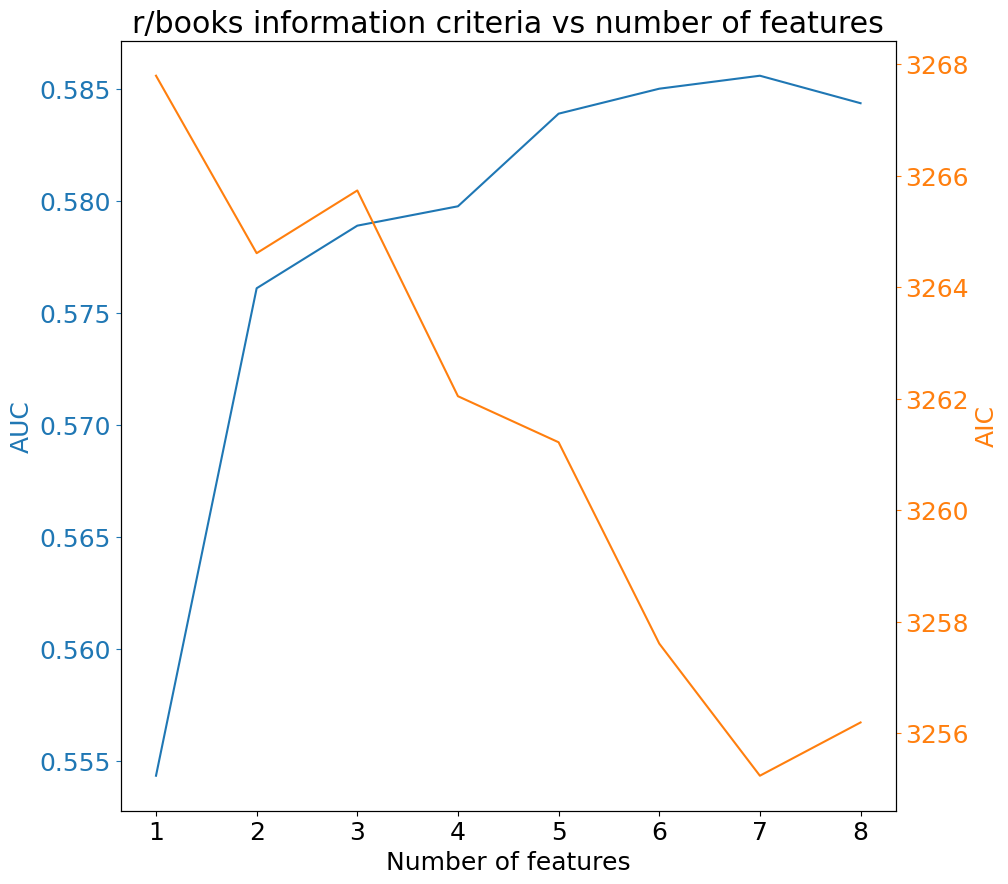

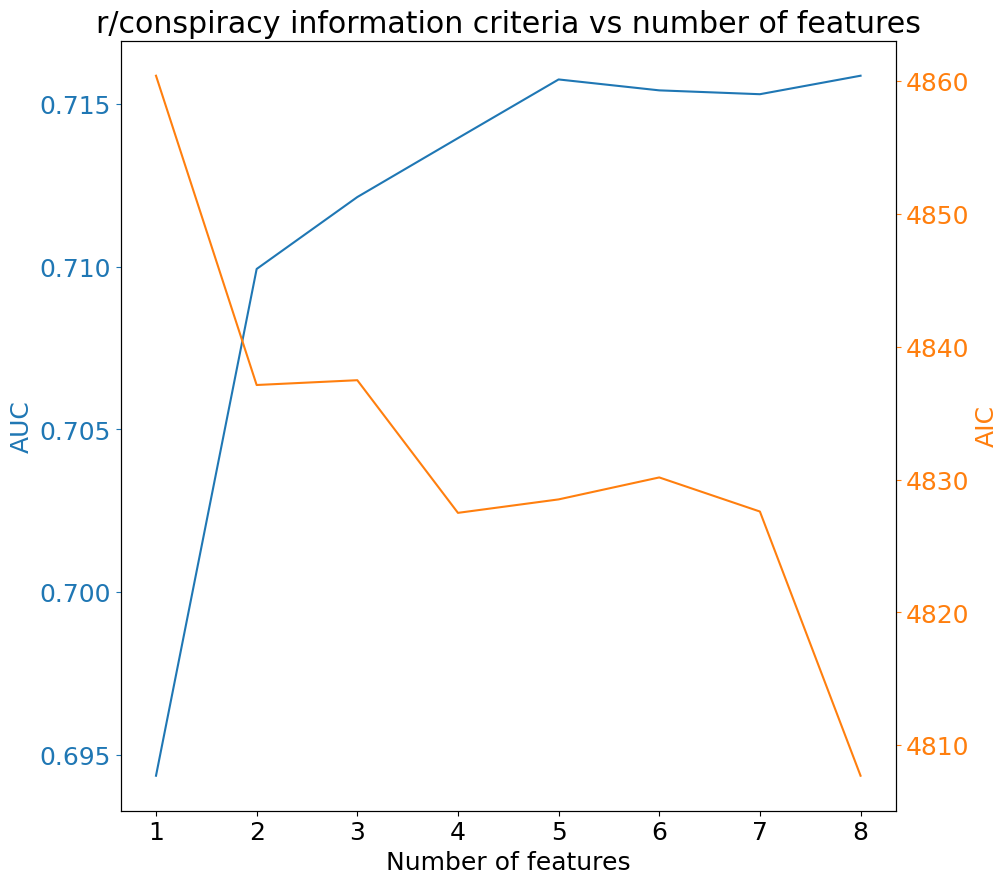

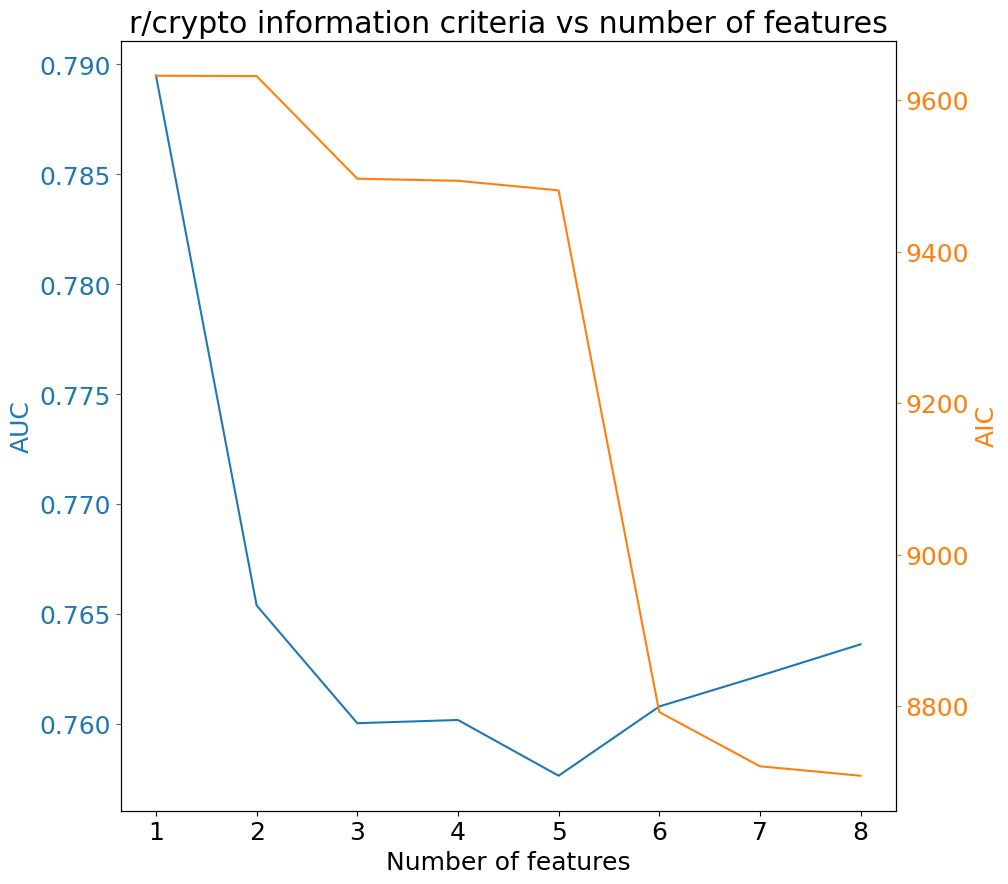

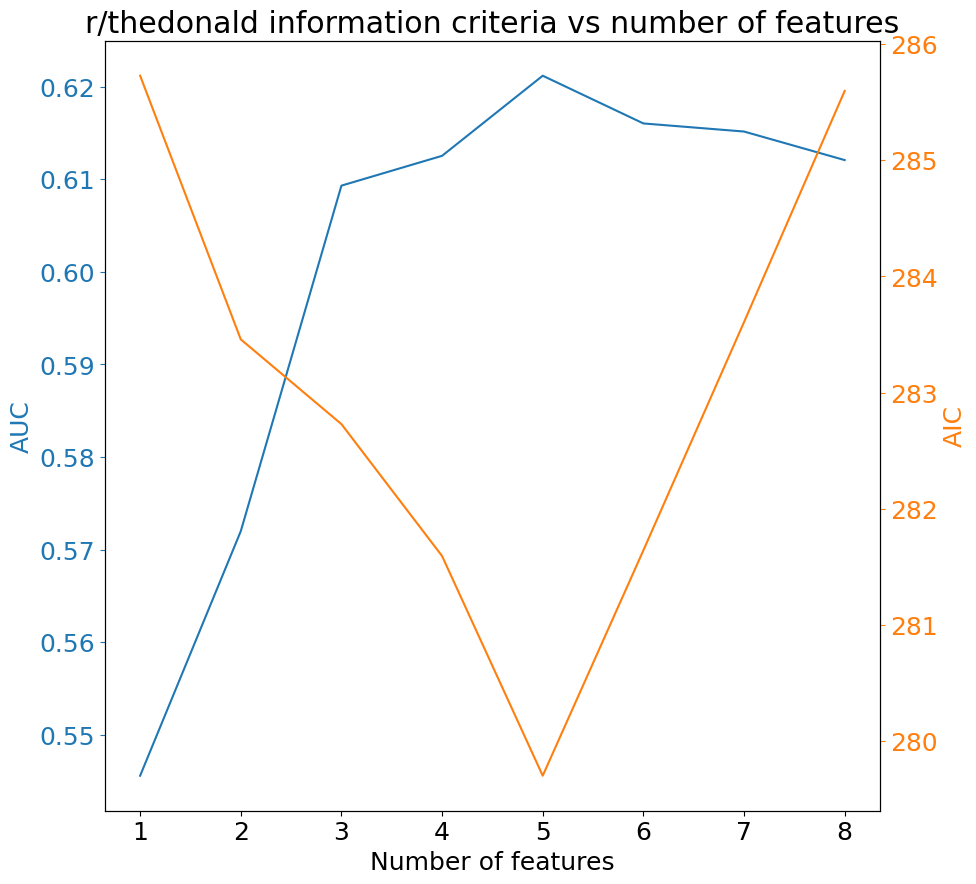

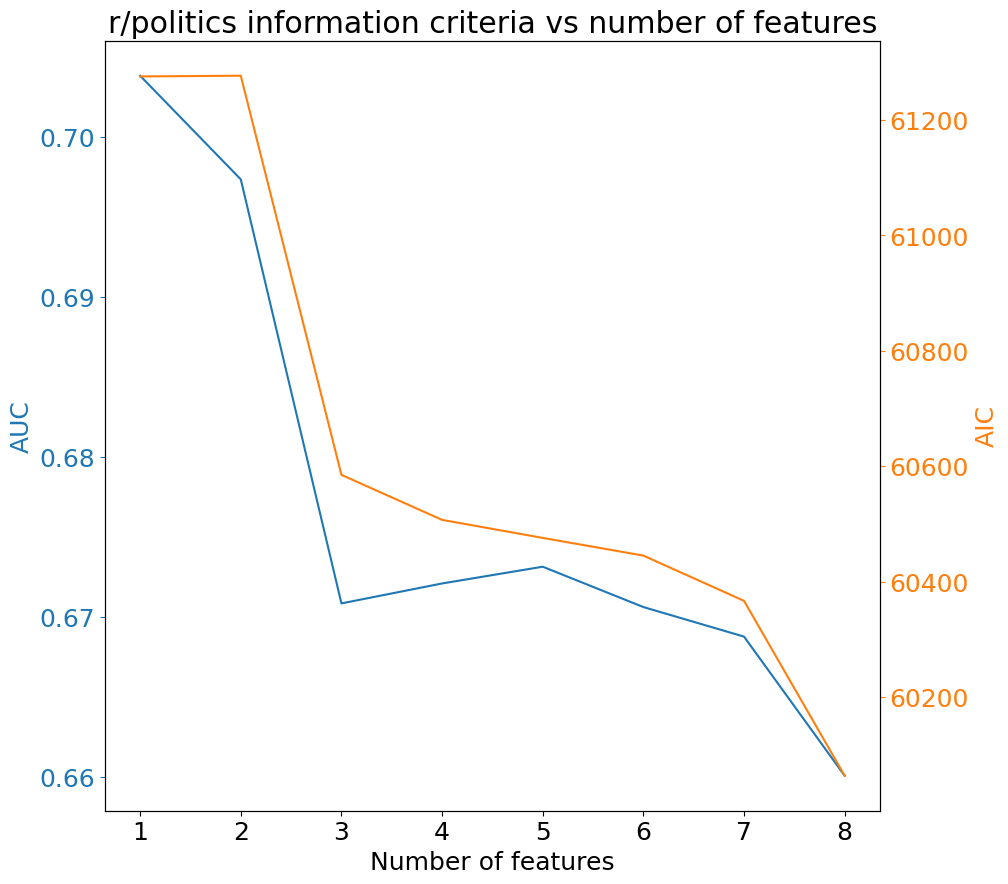

In [28]:
for subreddit in subreddit_logregs:
    for period in subreddit_logregs[subreddit].regression_metrics:
        plot_metrics_vs_features_one_period(subreddit_logregs[subreddit].regression_metrics,
            period, ['auc', 'aic'], name=f"{subreddit}", legend_loc=(0.9,0.83),
            outfile=f"{outdir}/{subreddit}_p{period}"
            )

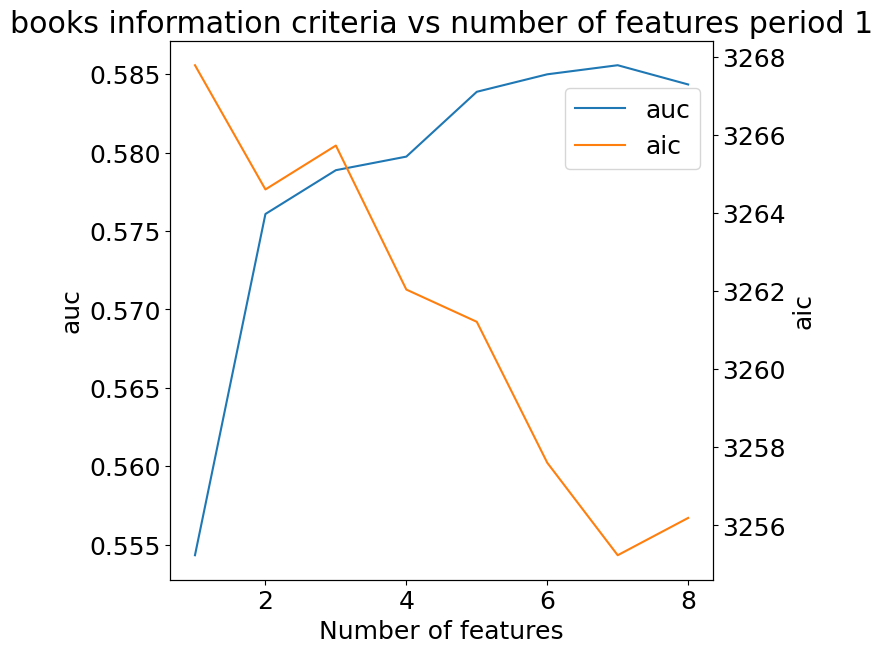

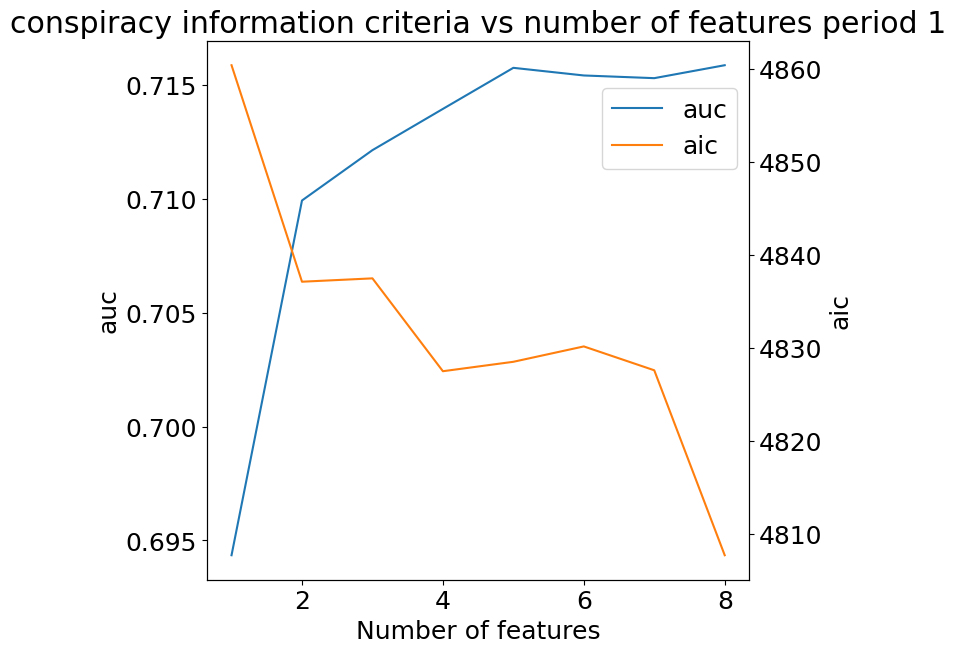

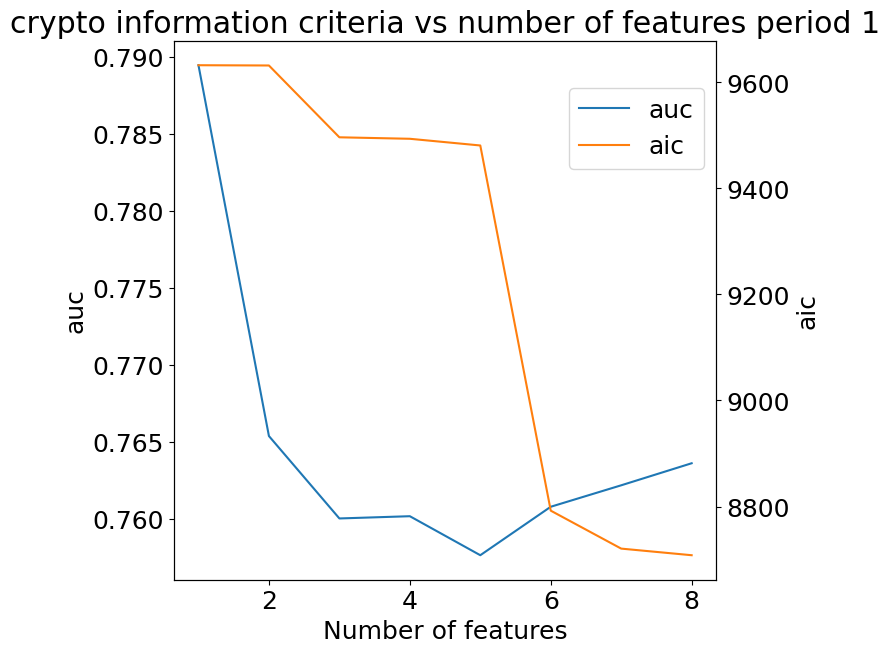

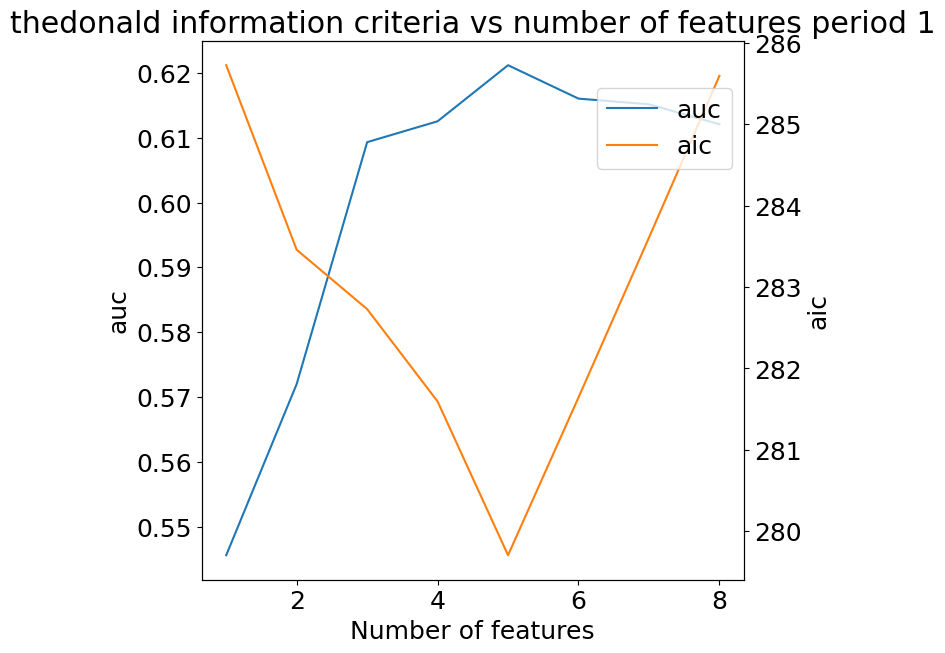

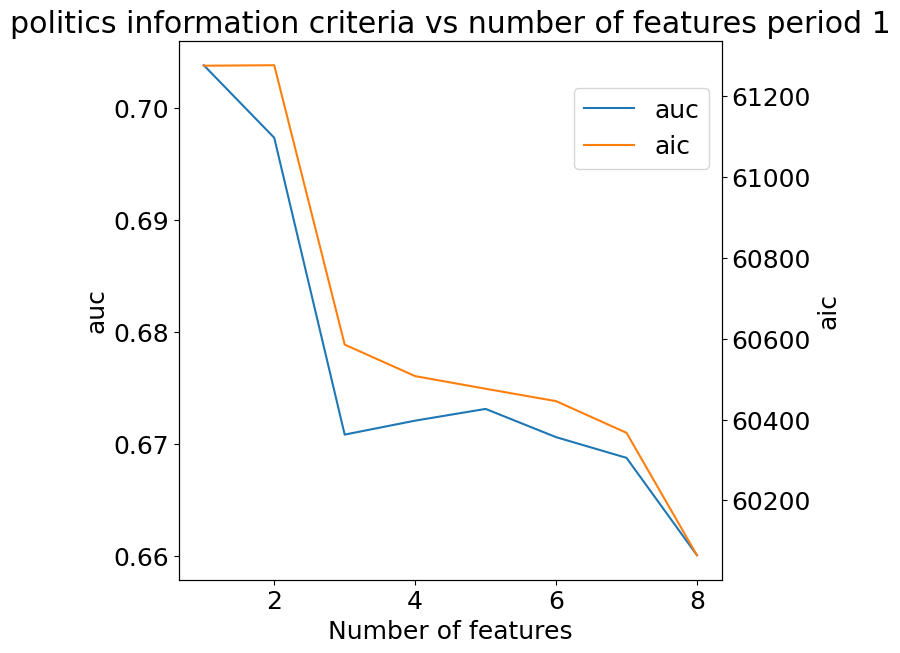

In [19]:
for subreddit in subreddit_logregs:
    for period in subreddit_logregs[subreddit].regression_metrics:
        subreddit_logregs[subreddit].plot_metrics_vs_features_one_period(
            period, ['auc', 'aic'], name=f"{subreddit}", legend_loc=(0.9,0.83),
            outfile=f"{outdir}/{subreddit}_p{period}"
            )

In [20]:
for subreddit in subreddit_logregs:
    subreddit_logregs[subreddit].get_FSS_metrics_df()

In [21]:
pickle.dump(subreddit_logregs, open(f"{outdir}/all_logregs.p", 'wb'))
#subreddit_logregs = pickle.load(open(f"{outdir}/all_logregs.p", 'rb'))

In [22]:
for subreddit in subreddit_logregs:
    subreddit_outfile = f"{outdir}/{subreddit}_{metrics_outfile}.xlsx"

    subreddit_logregs[subreddit].output_to_excel(subreddit_outfile, params_to_add=out_params)

        

In [23]:
subreddit_metrics = subreddit_logregs[subreddit].regression_metrics[1]['metrics']


In [24]:
subreddit_metrics
[
                    i
                    for i in subreddit_metrics.columns
                    if ((i == "aic") | (i == "bic"))
                ]

['aic']

In [25]:
subreddit_logregs['politics'].regression_metrics[1]['regression_params'][1]

,1
Intercept,0.469281
author_all_activity_count,0.008600


In [26]:
subreddit_logregs['politics'].regression_metrics[1]['metrics']

,num_features,model,aic,auc,validation_auc
1,1,success ~ author_all_activity_count,61275.399927,0.703803,0.655710
2,2,success ~ mean_author_sentiment_sign + author_...,61276.618956,0.697329,0.650723
3,3,success ~ mean_author_sentiment_sign + mean_au...,60585.284767,0.670843,0.612157
4,4,success ~ activity_ratio + mean_author_sentime...,60507.329379,0.672088,0.618162
5,5,success ~ sentiment_magnitude + activity_ratio...,60476.088848,0.673134,0.619572
6,6,success ~ sentiment_sign + sentiment_magnitude...,60445.464799,0.670615,0.617363
7,7,success ~ sentiment_sign + sentiment_magnitude...,60367.056674,0.668768,0.621539
8,8,success ~ sentiment_sign + sentiment_magnitude...,60064.185655,0.660079,0.610188
